In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data for each year
df_2018 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2018.csv')
df_2019 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2019.csv')
df_2020 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2020.csv')
df_2021 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2021.csv')

In [3]:
# concatenate all the dataframes into one
df = pd.concat([df_2018, df_2019, df_2020, df_2021], ignore_index=True)

# Analysis and Visualization


## Question 1: Do companies in certain sectors tend to receive more funding than others?
## We will start by analyzing the distribution of funding amounts across different sectors.

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_14672\2625323888.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10_df = top_10_df.groupby('Sector')['Amount($)', 'Company/Brand'].agg({'Amount($)': 'sum', 'Company/Brand': 'count'}).reset_index().sort_values(by='Amount($)', ascending=False)


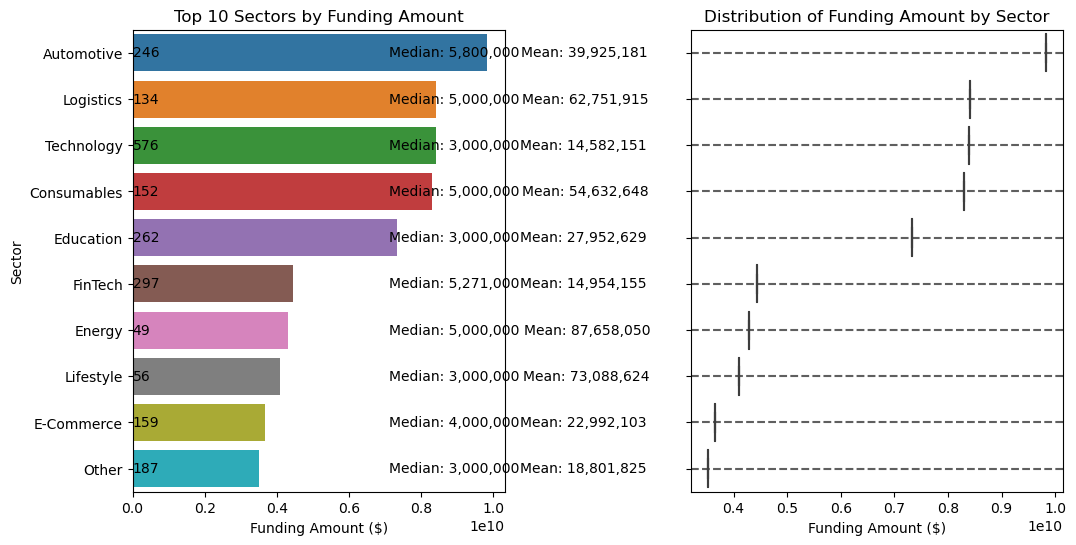

In [4]:
# Get top 10 sectors by funding amount
top_10_sectors = df.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).head(10).index

top_10_df = df[df['Sector'].isin(top_10_sectors)]

# Sort the top 10 sectors by funding amount in descending order
top_10_df = top_10_df.groupby('Sector')['Amount($)', 'Company/Brand'].agg({'Amount($)': 'sum', 'Company/Brand': 'count'}).reset_index().sort_values(by='Amount($)', ascending=False)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

sns.barplot(x='Amount($)', y='Sector', data=top_10_df, ax=ax1)

ax1.set_title('Top 10 Sectors by Funding Amount')
ax1.set_xlabel('Funding Amount ($)')
ax1.set_ylabel('Sector')

# Add annotations for the number of companies
for i, (value, sector) in enumerate(zip(top_10_df['Company/Brand'], top_10_df['Sector'])):
    ax1.text(value, i, f'{value:,}', va='center')

# Create boxplot for funding amount by sector
sns.boxplot(x='Amount($)', y='Sector', data=top_10_df, ax=ax2)

# Set plot title and axis labels for boxplot
ax2.set_title('Distribution of Funding Amount by Sector')
ax2.set_xlabel('Funding Amount ($)')
ax2.set_ylabel('')

# Add mean and median lines for each sector to boxplot
for i, sector in enumerate(top_10_df['Sector']):
    sector_data = df[df['Sector'] == sector]['Amount($)']
    mean = sector_data.mean()
    median = sector_data.median()
    ax2.axhline(i, linestyle='--', color='gray', alpha=0.5)
    ax2.axhline(i, linestyle='--', color='black', alpha=0.5)
    ax2.text(mean, i, f'Mean: {mean:,.0f}', va='center', ha='left', fontsize=10)
    ax2.text(median, i, f'Median: {median:,.0f}', va='center', ha='right', fontsize=10)

# Add space between subplots and adjust layout
fig.subplots_adjust(wspace=0.5)

# Show plot
plt.show()


### The combined bar and boxplot provides a comprehensive overview of the funding distribution of the top 10 sectors. The bar plot shows the total funding amount for each sector, while the boxplot provides information about the distribution of funding amounts within each sector, including the median, interquartile range, and outliers.

# Question 2: Is there a correlation between the stage of development of a company and the amount of funding it receives?
## We will use a scatter plot to visualize the relationship between the stage and funding amount and calculate the correlation coefficient.

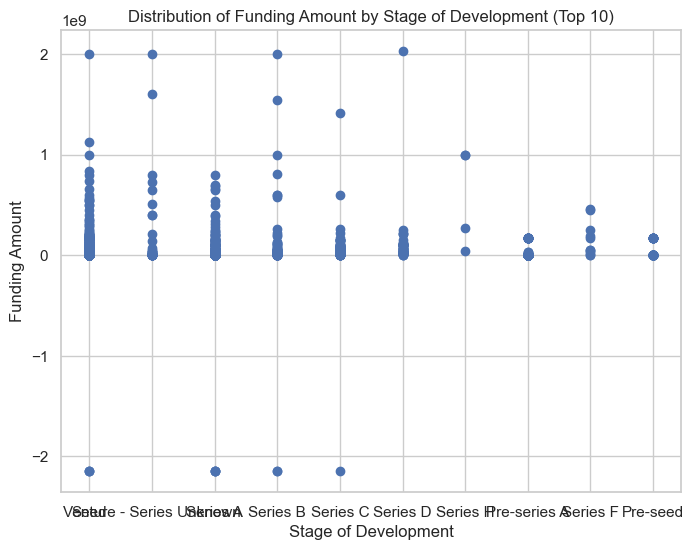

In [5]:
# Rename the 'Amount($)' column to 'Amount'
df = df.rename(columns={'Amount($)': 'Amount'})

# Calculate the total funding amount by stage of development
stage_totals = df.groupby('Stage')['Amount'].sum().reset_index()

# Select the top 10 stages by funding amount
top_stages = stage_totals.sort_values('Amount', ascending=False).head(10)['Stage'].tolist()

# Create a new DataFrame that only includes the top 10 stages
df_top = df[df['Stage'].isin(top_stages)]

# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x='Stage', y='Amount', data=df_top)
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount')
plt.title('Distribution of Funding Amount by Stage of Development (Top 10)')
plt.show()

### The scatter plot shows the distribution of funding amount by stage of development for the top 10 stages. It appears that the later stages of development, such as Series D, have the highest funding amounts, while the early stages, such as Seed and Series A, have relatively lower funding amounts. This is consistent with the general trend in the startup industry where companies require more funding as they progress through various stages of development. However, it's worth noting that there are some outliers in each stage, indicating that funding amount is not solely determined by the stage of development.

## Question 3.
## Are companies with more founders more likely to receive larger amounts of funding?

## We're going use the bar chart and different distributive visuals to answer this question.

In [6]:
df1 = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)

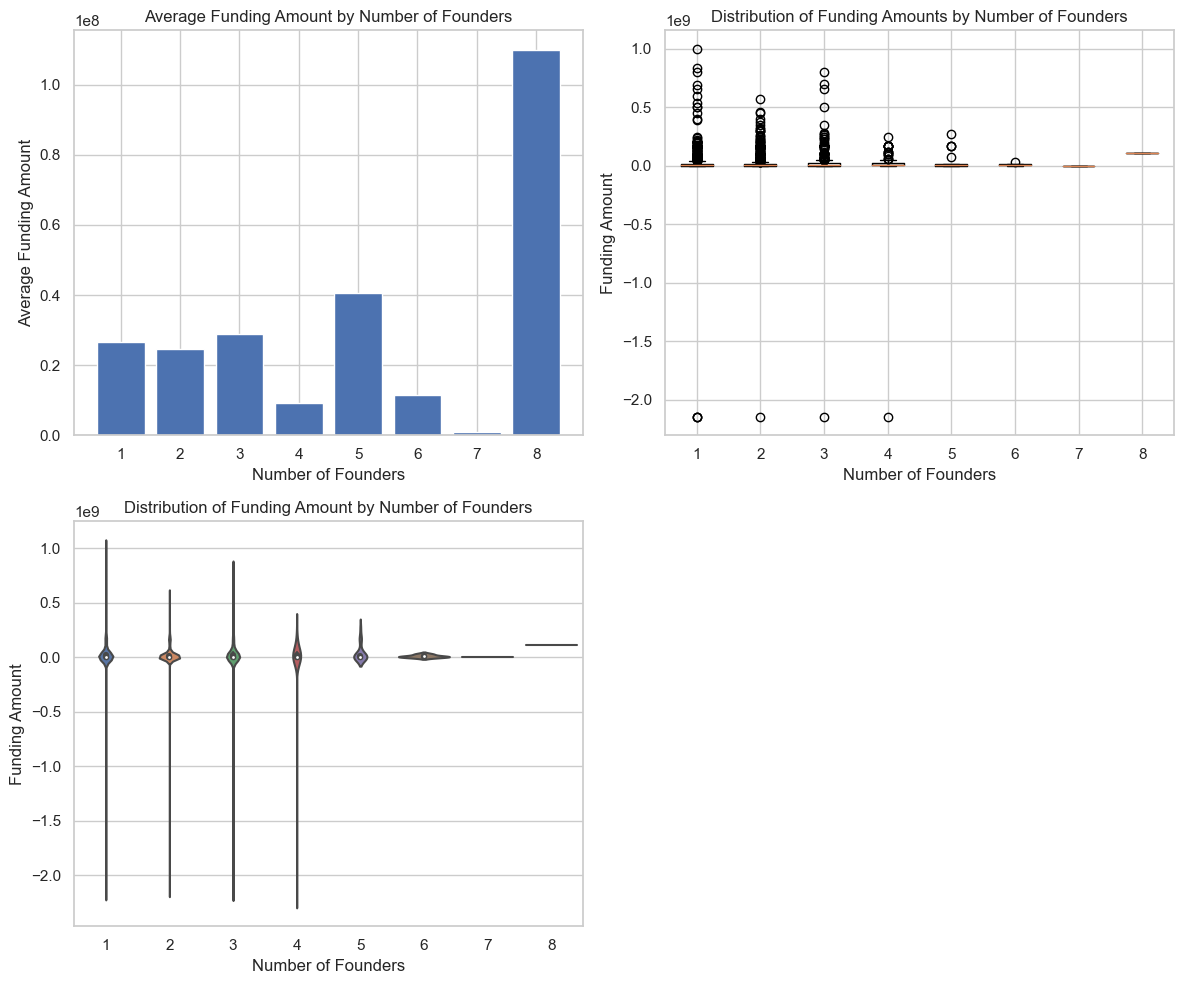

In [7]:
df1 = df1.dropna(subset=['Founders'])

df1['Founders'] = df1['Founders'].astype(str)

# Split the founders column into a list of founders
df1['Founders'] = df1['Founders'].str.split(',')

# Create a new column for the number of founders
df1['NumFounders'] = df1['Founders'].apply(lambda x: len(x))

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Bar chart - Top left
grouped = df1.groupby('NumFounders')['Amount($)'].mean()
axs[0, 0].bar(grouped.index, grouped.values)
axs[0, 0].set_xlabel('Number of Founders')
axs[0, 0].set_ylabel('Average Funding Amount')
axs[0, 0].set_title('Average Funding Amount by Number of Founders')

grouped = df1.groupby('NumFounders')['Amount($)'].apply(list)
axs[0, 1].boxplot(grouped.values, labels=grouped.index)
axs[0, 1].set_title('Distribution of Funding Amounts by Number of Founders')
axs[0, 1].set_xlabel('Number of Founders')
axs[0, 1].set_ylabel('Funding Amount')

sns.violinplot(x='NumFounders', y='Amount($)', data=df1, ax=axs[1, 0])
axs[1, 0].set_xlabel('Number of Founders')
axs[1, 0].set_ylabel('Funding Amount')
axs[1, 0].set_title('Distribution of Funding Amount by Number of Founders')

# Remove empty subplot - Bottom right
fig.delaxes(axs[1, 1])

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()


 From the bar chart, we can see that the average funding amount generally increases as the number of founders increases in most cases, with the 8th number of founders having the highest average funding amount. This suggests a positive relationship between the number of founders and funding amounts.
 
However, the box plot provides additional information about the distribution of funding amounts for each number of founders.The box plot for the 8th number of founders does not have a long tail on the top and bottom (indicating a narrow distribution), it suggests that the funding amounts for companies with 8 founders tend to be more concentrated around the median, with fewer extreme values.  On the other hand,the box plot for 1 number of founders has the longest tail, it indicates a wider distribution of funding amounts for companies with only 1 founder.

A weak negative correlation between the number of founders and funding amounts, it indicates that there is a tendency for companies with more founders to receive slightly lower funding amounts on average. This finding contrasts with the observation from the bar chart, where the average funding amount increased as the number of founders increased.

## Question 4
## Are there any patterns in the location of a company's headquarters and the amount of funding it receives?

## The Quest will be use some form of bar chart to compare the average funding with respect to location.

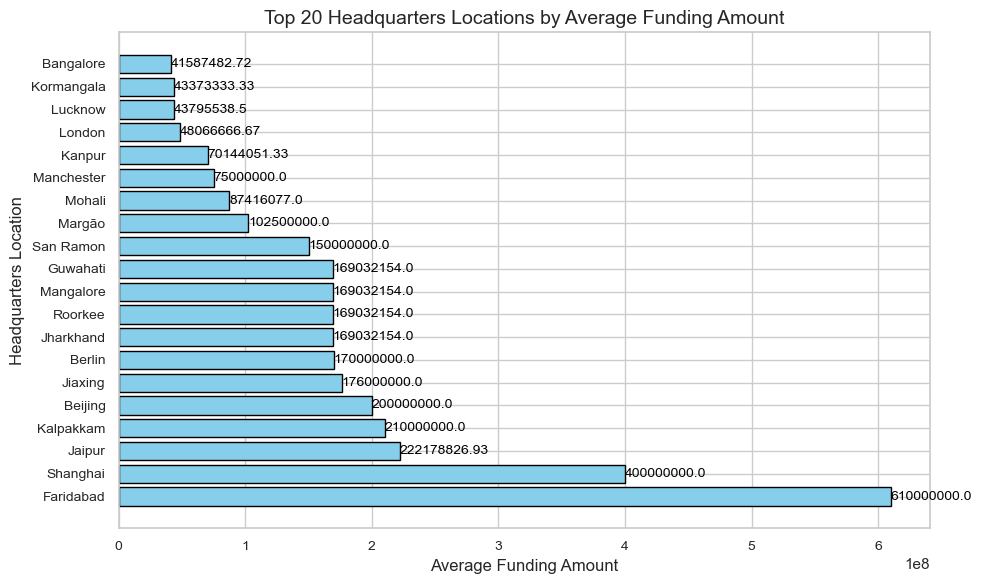

In [8]:
grouped = df.groupby('HeadQuarter')['Amount'].mean()

grouped = grouped.sort_values(ascending=False)

top_20 = grouped[:20]

# Create a horizontal bar chart to visualize the relationship between headquarters location and funding amounts
fig, ax = plt.subplots(figsize=(10, 6))  
# Customize the bar chart aesthetics
ax.barh(top_20.index, top_20.values, color='skyblue', edgecolor='black')  
ax.set_xlabel('Average Funding Amount', fontsize=12)
ax.set_ylabel('Headquarters Location', fontsize=12)  
ax.set_title('Top 20 Headquarters Locations by Average Funding Amount', fontsize=14) 

# Adjust the tick labels font size
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Add data labels to the bars
for i, v in enumerate(top_20.values):
    ax.text(v + 0.5, i, str(round(v, 2)), color='black', fontsize=10, va='center')  # Adjust the label position and font size

plt.tight_layout() 
plt.show()


The Chart shows a significant difference in the funding received by locations. We can estimate that startups in the city of Faridabad received the most funds per the averages accumalated. 610 million was what the startups in the city were averaging. The nearest city to them which was Shanghai trailed by over 210 million. 

We can approximate that the related sector of the startups in this city could be a factor. 

## Question 5. 

## Does the number of investors in a company tend to impact the amount of funding it receives?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


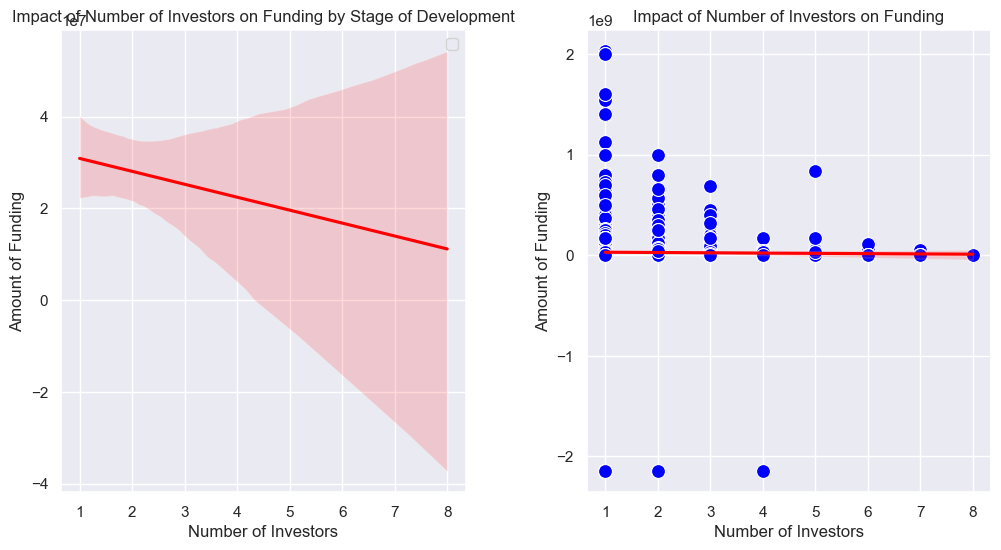

In [36]:
# Calculate total number of investors for each row
df['total_investors'] = df['Investor'].apply(lambda x: len(str(x).split(',')))

# Assign variables for scatter plot
number_of_investors = df['total_investors']
amount_of_funding = df['Amount']
stage_of_development = df['Stage']

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot scatter plot on the left
sns.set_style("darkgrid")
stage_colors = {'Early Stage': 'blue', 'Growth Stage': 'green', 'Mature Stage': 'orange'}
for stage in stage_colors:
    stage_indices = df1[df1['Stage'] == stage].index
    sns.scatterplot(x=number_of_investors[stage_indices], y=amount_of_funding[stage_indices],
                    s=100, color=stage_colors[stage], label=stage, ax=ax1)
sns.regplot(x=number_of_investors, y=amount_of_funding, scatter=False, color='red', ax=ax1)
ax1.set_xlabel('Number of Investors')
ax1.set_ylabel('Amount of Funding')
ax1.set_title('Impact of Number of Investors on Funding by Stage of Development')
ax1.legend()

# Plot scatter plot on the right
sns.set_style("darkgrid")
sns.scatterplot(x=number_of_investors, y=amount_of_funding, s=100, color='blue', ax=ax2)
sns.regplot(x=number_of_investors, y=amount_of_funding, scatter=False, color='red', ax=ax2)
ax2.set_xlabel('Number of Investors')
ax2.set_ylabel('Amount of Funding')
ax2.set_title('Impact of Number of Investors on Funding')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()


The horizontal trend observed in the scatter plot aligns with the weak correlation coefficient and supports the conclusion that there is no significant correlation. The data points scattered without a clear pattern further reinforce the lack of a strong relationship between the number of investors and the amount of funding. 

The distribution looks symetric on the 8 tally of investors it might suggest grand some of investment but the distribution is lean. 

There is another visuals showing the distribution and relationship between the stage of development of the business in relation to the amount and investors. It shows a downward trend as the number of investors increase. The average amount could be more as 
observed but the distribution could be lean. 

We can conclude that number of investors doesnt necessarily impact funding amount.